In [1]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import DateFormatter
import datetime
import dateutil.parser
import numpy as np

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
formatter = DateFormatter('%H:%M:%S')

In [4]:
data4 = pandas.read_json("fourmetre.json")
data3 = pandas.read_json("threemetre.json")
data2 = pandas.read_json("twometre.json")

data4['tag'] = pandas.Series(4, index=data4.index)
data3['tag'] = pandas.Series(3, index=data3.index)
data2['tag'] = pandas.Series(2, index=data2.index)

data4['rotation'] = pandas.Series(3, index=data4.index)
data3['rotation'] = pandas.Series(0, index=data3.index)
data2['rotation'] = pandas.Series(1, index=data2.index)

mergedData = pandas.concat([data4, data3, data2])

In [5]:
mergedData.head()

,agentId,major,minor,rssi,time,tx,uuid,tag,rotation
0,RPi four metre,5,5,-57,2016-07-12T03:12:23.861045,-58,d0d3fa86ca7645ec9bd96af400000005,4,3
1,RPi four metre,5,5,-57,2016-07-12T03:12:25.765122,-58,d0d3fa86ca7645ec9bd96af400000005,4,3
2,RPi four metre,5,5,-86,2016-07-12T03:12:26.718932,-58,d0d3fa86ca7645ec9bd96af400000005,4,3
3,RPi four metre,5,5,-57,2016-07-12T03:12:27.669189,-58,d0d3fa86ca7645ec9bd96af400000005,4,3
4,RPi four metre,5,5,-75,2016-07-12T03:12:29.578506,-58,d0d3fa86ca7645ec9bd96af400000005,4,3


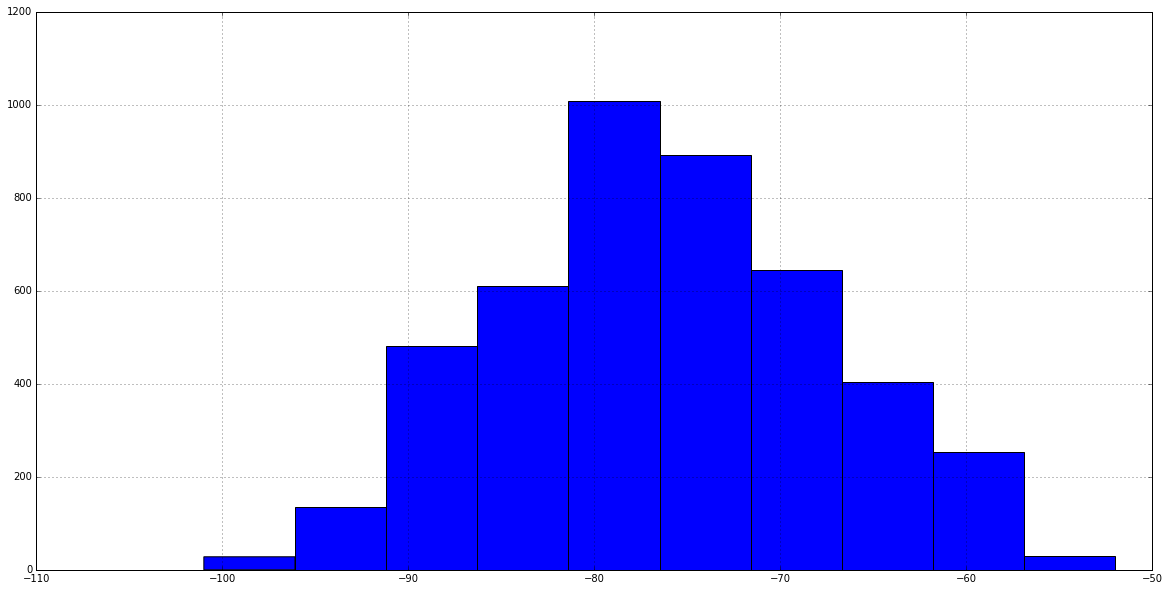

In [6]:
mergedData.rssi.hist()

In [7]:
def convert_timestring(row):
    return dateutil.parser.parse(row.time)


mergedData["timestamp"] = mergedData.apply (lambda row: convert_timestring(row), axis=1)

In [8]:
testRow = mergedData.iloc[[2]]
testRow

,agentId,major,minor,rssi,time,tx,uuid,tag,rotation,timestamp
2,RPi four metre,5,5,-86,2016-07-12T03:12:26.718932,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:12:26.718932


In [9]:
print testRow.timestamp
print testRow.timestamp + datetime.timedelta(minutes=1)

2   2016-07-12 03:12:26.718932
Name: timestamp, dtype: datetime64[ns]
2   2016-07-12 03:13:26.718932
Name: timestamp, dtype: datetime64[ns]


In [10]:
def addTime(row):
    return row.timestamp + datetime.timedelta(minutes=row.rotation)

mergedData["rotated_time"] = mergedData.apply (lambda row: addTime(row), axis=1)

In [11]:
print mergedData.timestamp[0]
print type(mergedData.timestamp[0])

0   2016-07-12 03:12:23.861045
0   2016-07-12 03:12:23.722455
0   2016-07-12 03:12:21.875394
Name: timestamp, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>


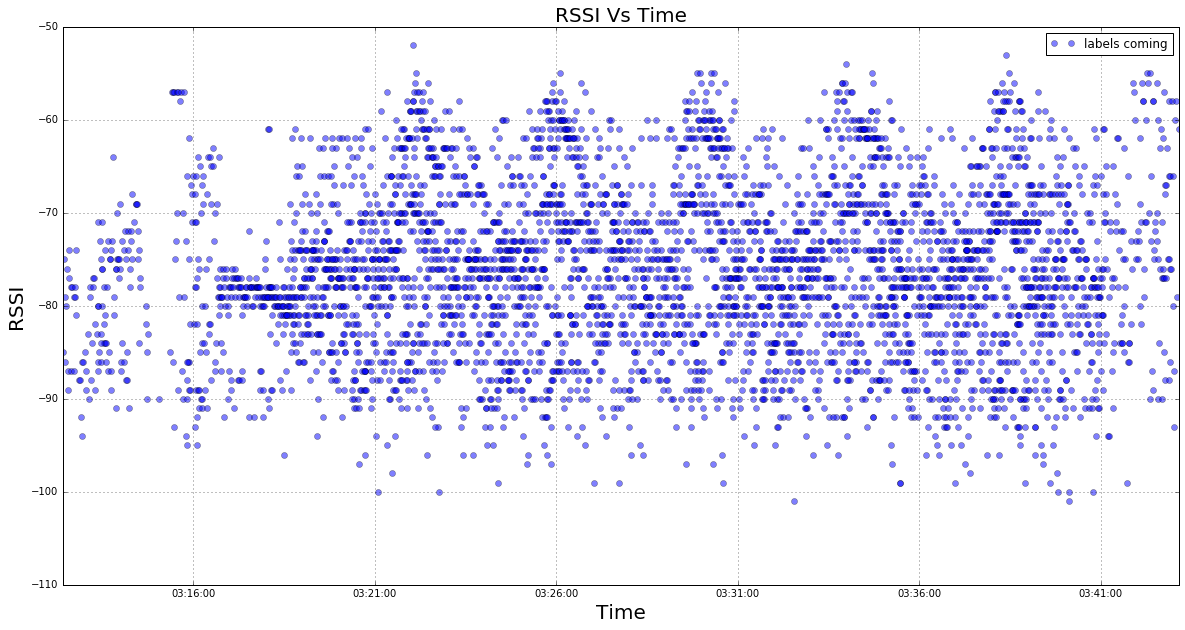

In [12]:
# plt.plot_date(data4.rotated_time, data4.rssi, label='4m', alpha=0.5)
# plt.plot_date(data3.rotated_time, data3.rssi, label='3m', alpha=0.5)
# plt.plot_date(data2.rotated_time, data2.rssi, label='2m', alpha=0.5)

plt.plot_date(mergedData.rotated_time, mergedData.rssi, label='labels coming', alpha=0.5)
plt.legend()
plt.xlabel('Time', size=20)
plt.ylabel('RSSI', size=20)
plt.title('RSSI Vs Time', size=20)
plt.grid()
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.show()

In [13]:
#create unique list of names
uniqueNames = mergedData.major.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pandas.DataFrame for elem in uniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = mergedData[:][mergedData.major == key] 
    
print uniqueNames
print DataFrameDict[5].shape
print DataFrameDict[9752].shape

[    5  9752 60467]
(3436, 11)
(1041, 11)


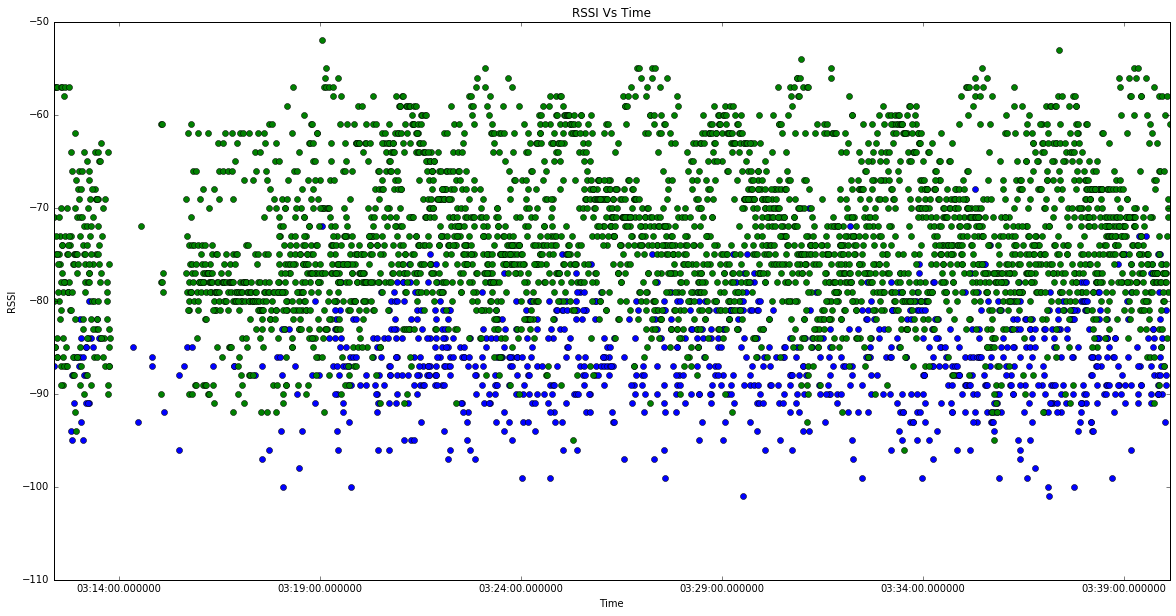

In [14]:
hockey = DataFrameDict[5]
estimote = DataFrameDict[9752]

plt.plot_date(estimote.timestamp, estimote.rssi, label='Estimote')
plt.plot_date(hockey.timestamp, hockey.rssi, label='Hockey')
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time')
# plt.legend()
plt.show()

In [15]:
startTime = datetime.datetime(2016, 7, 12, 3, 22, 0)
endTime   = datetime.datetime(2016, 7, 12, 3, 38, 25)
trimmedDF = mergedData[(mergedData["rotated_time"] > startTime)]
trimmedDF = trimmedDF[(trimmedDF["rotated_time"] < endTime)]

In [16]:
trimmedDF.head()

,agentId,major,minor,rssi,time,tx,uuid,tag,rotation,timestamp,rotated_time
259,RPi four metre,5,5,-67,2016-07-12T03:19:00.312221,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:19:00.312221,2016-07-12 03:22:00.312221
260,RPi four metre,5,5,-52,2016-07-12T03:19:02.217946,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:19:02.217946,2016-07-12 03:22:02.217946
261,RPi four metre,9752,43912,-72,2016-07-12T03:19:02.763844,-65,d0d3fa86ca7645ec9bd96af4022e7550,4,3,2016-07-12 03:19:02.763844,2016-07-12 03:22:02.763844
262,RPi four metre,5,5,-70,2016-07-12T03:19:03.174566,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:19:03.174566,2016-07-12 03:22:03.174566
263,RPi four metre,5,5,-70,2016-07-12T03:19:04.132086,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:19:04.132086,2016-07-12 03:22:04.132086


In [17]:
#check that there aren't too many x ticks. Step is in mili, so low values can crash the computer
xticks = np.arange(min(trimmedDF.rotated_time), 
                   max(trimmedDF.rotated_time), 
                   10*60*60*1000)
len(xticks) 

28

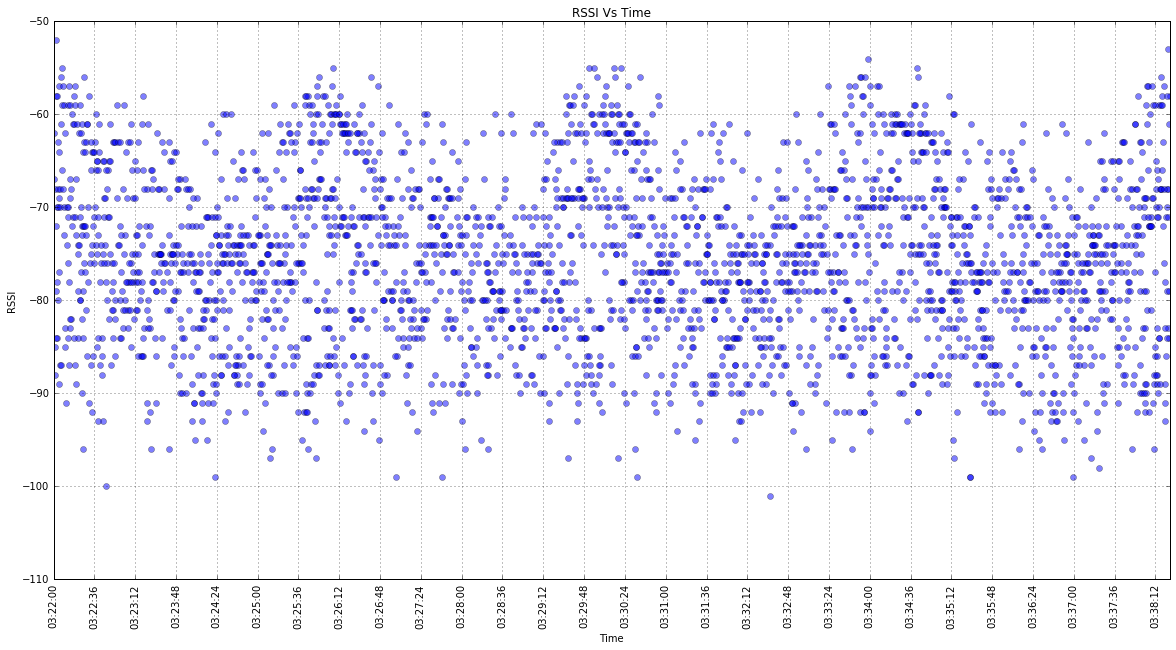

In [18]:
plt.plot_date(trimmedDF.rotated_time, trimmedDF.rssi, label='labels pending', alpha=0.5)
# plt.legend()
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time')
plt.xticks(xticks, rotation='vertical')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.grid()
plt.show()

In [19]:
def tdToInt(td):
    return td.microseconds + 1000000 * (td.seconds + 86400 * td.days)

def divtd(td1, td2):
    # http://stackoverflow.com/questions/865618/how-can-i-perform-divison-on-a-datetime-timedelta-in-python
    if isinstance(td2, (int, long)):
        return divtdi(td1, td2)
    us1 = tdToInt(td1)
    us2 = tdToInt(td2)
    return float(us1) / us2

period = datetime.timedelta(minutes=4)
nexttime = startTime + (period/2)
divtd((nexttime - startTime) , period) * (np.pi*2)

3.141592653589793

In [20]:
def timeToAngle(row, zeroTime, period):
    twoPi = np.pi*2
    timeAfterStart = row.rotated_time - startTime
    asAngle = divtd(timeAfterStart, period) * twoPi
    return asAngle % twoPi #wrap it

period = datetime.timedelta(minutes=4)
trimmedDF["theta"] = trimmedDF.apply (lambda row: timeToAngle(row, startTime, period), axis=1)
trimmedDF.head()

,agentId,major,minor,rssi,time,tx,uuid,tag,rotation,timestamp,rotated_time,theta
259,RPi four metre,5,5,-67,2016-07-12T03:19:00.312221,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:19:00.312221,2016-07-12 03:22:00.312221,0.008174
260,RPi four metre,5,5,-52,2016-07-12T03:19:02.217946,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:19:02.217946,2016-07-12 03:22:02.217946,0.058066
261,RPi four metre,9752,43912,-72,2016-07-12T03:19:02.763844,-65,d0d3fa86ca7645ec9bd96af4022e7550,4,3,2016-07-12 03:19:02.763844,2016-07-12 03:22:02.763844,0.072357
262,RPi four metre,5,5,-70,2016-07-12T03:19:03.174566,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:19:03.174566,2016-07-12 03:22:03.174566,0.083110
263,RPi four metre,5,5,-70,2016-07-12T03:19:04.132086,-58,d0d3fa86ca7645ec9bd96af400000005,4,3,2016-07-12 03:19:04.132086,2016-07-12 03:22:04.132086,0.108178


In [21]:
trimmedDF.tag.unique()

array([4, 3, 2])

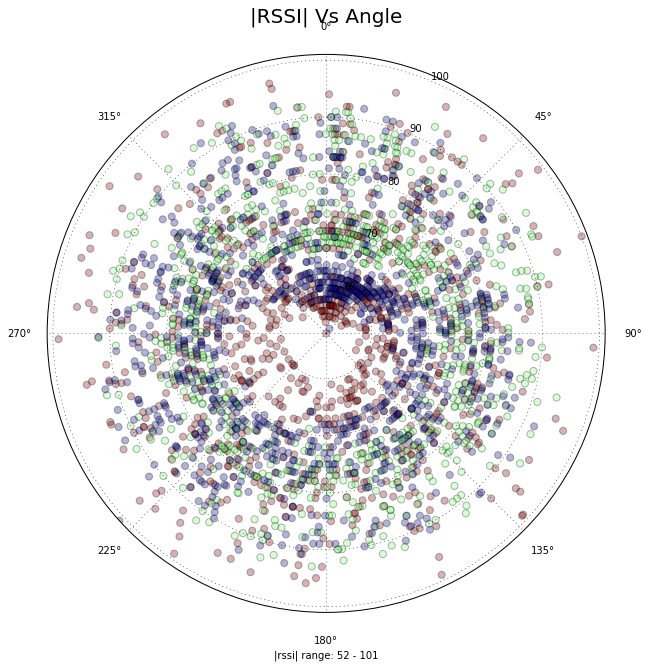

In [34]:
r = trimmedDF.rssi * -1 #can't show negative numbers on a polar graph
theta = trimmedDF.theta

ax = plt.subplot(111, projection='polar')
c = plt.scatter(theta, r, c=trimmedDF.tag, s=50)
c.set_alpha(0.3)

plt.gca().set_ylim(min(r),max(r))
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi*0.5)

plt.title('|RSSI| Vs Angle', size=20)
plt.xlabel("|rssi| range: "+str(min(r))+" - "+str(max(r)))

plt.show()